In [1]:
# Isolation Forest 
# Hyperparameter Tuning

In [77]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_csv("adult_with_headers (1) (1).csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [81]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [83]:
df.shape

(32561, 15)

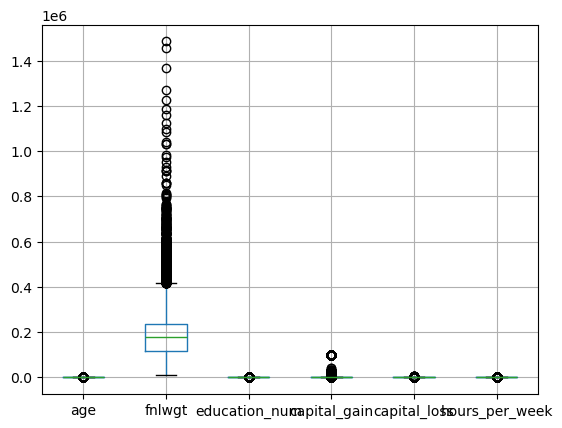

In [85]:
df.boxplot()
plt.show()

In [86]:
x=df.loc[:,['age','fnlwgt']]
x

,age,fnlwgt
0,39,77516
1,50,83311
2,38,215646
3,53,234721
4,28,338409
...,...,...
32556,27,257302
32557,40,154374
32558,58,151910
32559,22,201490


In [89]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.2,random_state=42)

In [91]:
iso_forest

IsolationForest(contamination=0.2, random_state=42)

In [93]:
iso_forest.fit(x)

IsolationForest(contamination=0.2, random_state=42)

In [94]:
predictions = iso_forest.predict(x)
x["anomaly"]=predictions

In [97]:
print(x)

       age  fnlwgt  anomaly
0       39   77516        1
1       50   83311        1
2       38  215646        1
3       53  234721        1
4       28  338409        1
...    ...     ...      ...
32556   27  257302        1
32557   40  154374        1
32558   58  151910        1
32559   22  201490        1
32560   52  287927        1

[32561 rows x 3 columns]


In [99]:
# Hyperparameter Tuning

In [108]:
df['education_num'] = iso_forest.fit_predict(df[['education_num']])
df_clean = df[df['education_num'] == 1]

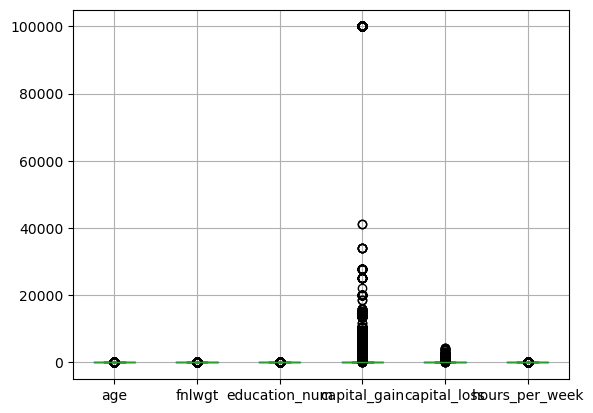

In [111]:
df.boxplot()
plt.show() 